<a href="https://colab.research.google.com/github/imymemineyay/Mini-Project-4/blob/main/%EA%B0%9D%EC%B2%B4_%EC%9D%B8%EC%8B%9D_%EB%AA%A8%EB%8D%B8%EC%97%90_%EB%8C%80%ED%95%9C_%EC%9D%B4%ED%95%B4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **What is Object Detection**

- 한 이미지에서 객체와 그 경계 상자를 탐지
- 이미지를 입력받고, 경계 상자와 객체 클래스 리스트를 출력
- 경계 상자에 대해 그에 대응하는 예측 클래스와 클래스의 신뢰도 출력

### **Example**

자율 주행 자동차, 의료 분야 방사선 사진 등


### **Bounding Box**
이미지에서 하나의 객체 전체를 포함하는 가장 작은 직사각형

### IOU(Intersection Over Union)

실측값(ground truth)와 모델이 예측한 값이 얼마나 겹치는지를 나타내는 지표

IOU = Area of Overlap / Area of Union

IOU가 높을수록 잘 예측한 모델

### NMS(Non-Maximum Suppression, 비최댓값 억제)

확률이 가장 높은 상자와 겹치는 상자들을 제거하는 과정<br>
최댓값을 갖지 않는 상자들을 제거<br>

- **Process**

확률 기준으로 모든 상자를 정렬하고 먼저 가장 확률이 높은 상자를 취함 → 각 상자에 대해 다른 모든 상자와의 IOU계산 → 특정 임곗값을 넘는 상자 제거


### **Precision vs. Recall**

FP : 예측이 실제 상자와 일치하지 않는지 측정 (precision) <br>
FN : 실제 분류값이 그와 일치하는 예측을 갖지 못하는지 측정 (recall)

precision : 음성을 양성으로 예측하는 것 <br>
ex) 스팸 - 정상 메일을 스팸으로 처리할 확률을 줄이는 것이 목적

recall : 양성을 음성으로 예측하는 것 <br>
ex) 암 - 암 환자에게 본인의 병이 암이 아니라고 하는 확률을 줄이는 것이 목적

● 모델이 안정적이지 않은 특징을 기반으로 객체 존재를 예측하면 거짓긍정이 많아져서 **정밀도**가 낮아짐 <br>
→ 명확한? 기준없이 객체를 탐색할 시 틀렸는데 맞았다고 할 가능성 多

● 모델이 너무 엄격해서 정확한 조건을 만족할 때만 객체가 탐지된 것으로 간주하면 거짓부정이 많아져서 **재현율**이 낮아짐 <br>
→ 정확한 것말고 다 오류라고 처리할 가능성 多

### **Precision-Recall Curve**

신뢰도 임계값마다 모델의 정밀도와 재현율을 시각화
모든 bounding box와 함께 모델이 예측의 정확성이 얼마나 확실하는지 0~1 사이의 숫자로 나타내는 신뢰도 출력

임계값 T에 따라 정밀도와 재현율이 달라짐
- 임계값 T이하의 예측은 제거함
- T가 1에 가까우면 정밀도는 높지만 재현율은 낮음
- 놓치는 객체가 많아져서 재현율이 낮아짐. 즉, 신뢰도가 높은 예측만 유지하기 때문에 정밀도는 높아짐
- T가 0에 가까우면 정밀도는 낮지만 재현율은 높음
- 대부분의 예측을 유지하기 때문에 재현율은 높아지고, 거짓긍정이 많아져서 정밀도가 낮아짐

ex) <br>
⓵ 자율 주행 차량 → 재현율 높아야함<br>
⓶ 투자 → 정밀도를 높여야함


### **AP(Average Precision, 평균 정밀도)와 mAP(mean Average Precision)**

- 곡선의 아래 영역에 해당
- 항상 1*1 정사각형 모양(0~1의 값을 가짐)
- 단일 클래스에 대한 모델 성능 정보를 제공
- 전역 점수를 얻기 위해서 mAP 사용<br>
ex) 데이터셋이 10개의 클래스로 구성된다면 각 클래스에 대한 AP를 계산하고, 그 숫자들의 평균을 다시 구함

- mAP 사용 :

최소 2개 이상의 객체를 탐지하는 대회인 PASCAL Visual Object Classes와 Common Objects in Context(COCO)에서 mAP가 사용됨 <br>

COCO 데이터셋이 더 많은 클래스를 포함하고 있기 때문에 보통 Pascal VOC보다 점수가 더 낮게 나옴












출처 : https://youtu.be/fdWx3QV5n44

# **What is YOLO?**
- YOLO는 정확한 성능보다는 real-time application을 위한 **빠른 속도**의 알고리즘에 초점<br>
(성능이 어느정도 괜찮으면 빠른게 무조건 좋음)

- 이미지로부터 한 번에 class 와 bounding box 예측

- 전체 이미지를 보고 object detection을 수행하기 때문에 배경 오류가 적고 일반화 성능 좋음


- **1-stage detector**를 사용하며 속도 상승

- RetinaNet 과 마찬가지로 FPN을 도입해 정확도 높임

- RetinaNet 에 비하면 정확도는 4mAP 정도 떨어지지만, 속도는 더 빠르다는 장점

(*RetinaNet : Focal Loss라는 개념의 도입과 FPN 덕분에 기존 모델들 보다 정확도 높고 속도 역시 1-stage detector 모델보다 빠른 모델)

- 작은 크기의 물체를 탐지하는 데 어려움

- 백본 모델 기반

- 특징 추출기라고도 불림

- 자체 맞춤 아키텍처 사용

3개의 scale 학습(small, medium, large로 구분)




## **⓵ 2-stage detector** : 객체 탐지까지의 과정을 두개의 detector로 나눠서 하는 방법 <br>
(물체 영역 예측, 물체의 레이블 예측) <br>

## **Process**
 인풋 이미지 → 오브젝트가 존재할 만한 영역 제한 region proposal 네트워크 → 해당 영역에서 feature map 과 정보를 얻어내는 feature extractor (CNN 기반) → dense layer → 정확한 object 위치와 레이블 예측

 ※ 네트워크를 통해 object의 bounding box 예측 후보 추출


## **⓶ 1-stage detector** : 위의 과정을 단일 과정으로 압축시킨 구조를 갖는 detector

## **Process**

인풋이미지 → feature extractor를 통한 feature map 정보 추출 → dense layer → object 바운딩 박스와 레이블 예측

dense layer 에서의 연산 : feature map의 셀 단위
13*13 feature map → 169 셀을 대상으로 연산 수행

※ feature map의 개수에 따라 상대적으로 연산량 크게 증가<br>
※ 셀 별로 강제로 5개 9개 등 숫자를 정해, 후보 바운딩 박스 정하고 시작 (= anchor box)

ex) YOLOv1, YOLOv2, YOLOv3, YOLOv4


# **What is YOLOv3?**

v2대비 속도는 다소 느리지만, 성능은 개선(small object 성능 개선)

사전에 설정한 anchor box를 토대로 bounding box 예측


**Class Prediction**<br>
logistic classifier 사용 <br>
binary cross entropy loss 사용<br>

**Process**<br>
이미지 → darknet53(feature extractor) → downsampling → 최초 detection 진행 → upsampling 해서 detection 진행 → upsampling 해서 detection 진행


**Anchor Box**<br>
- 사전 정의된 상자
- 객체에 가장 근접한 앵커 박스를 맞추고 신경망을 사용해 앵커 박스의 크기를 조정하는 과정 때문에 tx,ty,tw,th필요

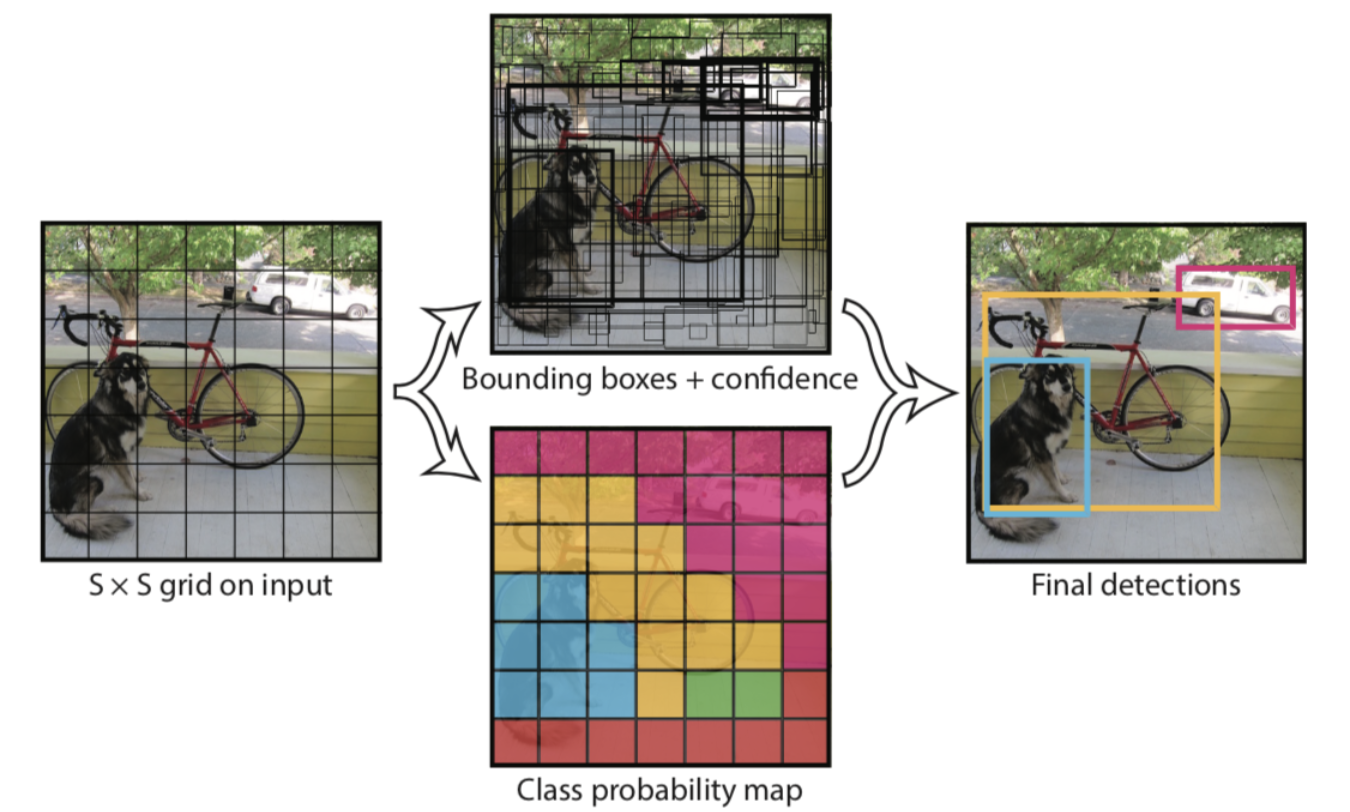

► Yolo는 S*S grid로 나눠서 bounding box와 confidence를 계산해서 확률적으로 높은 box 도출 그리고 각 클래스가 해당하는 영역을 probability map으로 표시(각 그리드마다 확률적인 map 표시) 그후 두 가지를  합쳐 최종 결과 도출<br>
출처 : https://www.youtube.com/watch?v=jqykPH3jbic

# **What is CNN?**

CNN(Convolutional Neural Network
), "오버피팅" 문제를 해결하고자 나옴

Neural Network <br>
→ 딥해질수록 오버피팅 가능성 증가 <br>
→ 자유도가 커져서 오차의 합이 0으로 되게끔 할 수 있음

(*자유도 : 독립적인 미지의 수)


● fully connected layer

→ 불필요한 계산량 증가<br>
→ 융통성 없는 모델 생성

그래서, 효율적이고 오버피팅이 일어나지 않는 머신을 만들고자 Convolution을 이용해서 Neural Network를 만들고자 하는 것
fully connected layer 에서 신경다발 몇개를 끊고 재구성하는 것 <br>

🧡 기대효과<br>

1. 효율적   2. 특징적


# **이미지에 convolutional 을 한다는 것은?**

→ 이미지의 특징을 뽑는 것

(특징들을 가지고 학습을 시켰을 때 이미지 분석이 더 효과적)

stride : fully connected layer을 통과할 때 이미지가 그렇게 크지 않도록 줄여나가는 것 (=간격)


# **What is Convolution?**

: 행렬 사이에 이루어지는 수학 연산자 (합성곱)<br>
: 원본 메트릭스에서 커널 혹은 필터라고 불리는 특정 윈도우 크기의 행렬을 가지고 있으면 이 행렬을 원본 메트릭스에 대응되는 부분과 하나하나 곱한 다음 더해서 새로운 하나의 합성곱의 결과로 추출

🤍 커널을 파라미터로 바라봐서 처음에 랜덤으로 지정했다가 트레이닝 데이터에 맞는 커널값을 학습과정에서 자동으로 찾을 수 있도록 만들어주는 구조

🧡 이 과정을 통해 원본 이미지의 특징을 나타내는 feature map 추출

# **What is pooling?**

차원을 축소하는 연산 <br>
가장 강한 특징만 추출하는 선별 효과 <br>
원본 소스 메트릭스에서 내가 지정한 커널사이즈 필터 사이즈에 대응되는 부분에서 어떤 연산을 수행해서 하나의 값을 추출하는 연산

(1) Max Pooling  최대값 추출
(2) Average Pooling 평균값 추출
(3) Min Pooling  최소값 추출


# **CNN Process**

원본 이미지에서 특징 추출맵 여러개 출력 → 풀링으로 차원 축소 → 컨볼루션•풀링의 반복 수행 → flattenning (벡터화) → ANN 구조 → Output 레이블 개수 만큼 softmax regression 수행 → Ouput 출력


# **ANN vs. CNN**

ANN : 모든 데이터가 1차원 형태로 변한 후 연산 수행
CNN : 2D 형태의 공간적 특징 추출

## **Conv Layer**

많이 쌓일수록 더 넓은 영역의 상관관게를 추출하는 것이고 더 많은 데이터를 압축하는 것


## **Terms**
filter : 이미지 특징을 잡아내는 학습 파라미터 (=kernel)<br>
filter의 값 : 가중치 <br>
stride : 필터의 이동간격<br>
channel : 매트릭스 너비, ex) 단일 색상 = 1 | 컬러 색상 = 3

피처맵의 채널 == 필터의 갯수

→ 상관관계를 얻기 위해서 다양한 특징들을 분리해서 추출하는데 이 추출한 특징들을 각각의 채널에 담기 위해서 채널값을 키우는 것

🙆🏼‍♀️ 이미지는 RGB(red,green,blue)로 구성되어 필터가 해당 이미지를 순회하며 합성 곱을 계산하는데 이때 R,G,B별로 각각의 피처 맵이 나온다. 그리고 이 각각의 피처맵의 합이 최종 피처맵이된다. 그런데 이때 주의해야할게 이미지의 특징별로 다양한 필터를 적용하기 때문에 최종적으로는 많은 피처맵이 도출되게 된다. 그리고 그 수는 출력 데이터인 feture map의 채널이 된다.

즉, 입력 데이터에 적용한 필터의 개수 == 출력 데이터의 feature map 의 채널

참고 : https://www.youtube.com/watch?v=fdWx3QV5n44&t=3358s

# **YOLO 구현**

### **네트워크 훈련을 위해 구성하는 작업**


Darknet은 YOLO (You Only Look Once) 알고리즘을 구현한 오픈 소스 프레임워크로, 객체 검출을 위한 딥러닝 모델을 구축하고 훈련시킬 수 있음

<hr>

**Darknet 네트워크 훈련을 위한 수행 작업 :**

⓵ 네트워크 구조 설정: <br>
Darknet의 구성 파일인 .cfg 파일을 수정하여 네트워크 구조 정의<br>
이 파일은 레이어, 노드, 하이퍼파라미터 등 네트워크의 구조와 설정을 포함하고 있음

⓶ 데이터셋 준비: <br>
훈련에 사용할 데이터셋 준비<br>
객체 검출을 위한 데이터셋은 주로 이미지와 해당 객체의 경계 상자(bounding box) 정보로 구성됨

③ 클래스 레이블 정의: <br>
객체 검출 작업에서는 검출하고자 하는 객체의 클래스 레이블 정의<br>
ex) helmet, without_helmet

④ 학습 설정: <br>
훈련에 필요한 하이퍼파라미터 설정, 데이터 경로, 클래스 레이블 등을 정의 <br>
이 정보는 Darknet의 .cfg 파일과 .data 파일에 포함됨

<hr>

위의 작업을 수행하여 Darknet 네트워크를 훈련하기 위한 구성을 완료할 수 있음 <br>


### **훈련시키기**


./darknet: Darknet 실행 파일을 호출합니다. 이 명령어를 통해 Darknet 프레임워크가 실행됩니다.

detector train: Darknet에서 제공하는 학습 명령어입니다. 이를 통해 객체 탐지 모델을 학습할 수 있습니다.

data/obj.data: 객체 탐지 학습에 필요한 데이터 정보를 포함하는 파일의 경로입니다. 해당 파일은 클래스 수, 훈련 데이터 파일 경로, 검증 데이터 파일 경로 등을 설정합니다.

cfg/yolov3_training.cfg: 학습에 사용할 YOLOv3 모델의 설정 파일 경로입니다. 해당 파일은 네트워크 아키텍처, 학습 관련 하이퍼파라미터, 데이터 경로 등을 정의합니다.

darknet53.conv.74: 사전 훈련된 가중치 파일의 경로입니다. 이 파일은 ImageNet 데이터셋으로 사전 훈련된 Darknet-53 네트워크의 가중치를 포함하고 있습니다. 이를 통해 초기 가중치로서 사용됩니다.

-dont_show: 학습 중에는 그래프나 이미지를 표시하지 않도록 하는 옵션입니다. 이렇게 설정하면 학습 과정이 콘솔에 출력되지만 시각적인 출력은 표시되지 않습니다.

따라서 주어진 명령어를 실행하면 Darknet을 사용하여 YOLOv3 모델을 주어진 데이터로 학습시키게 됩니다. 학습 결과는 콘솔에 출력되며, backup 폴더에는 주기적으로 가중치 파일이 저장됩니다.






